In [2]:
import numpy as np
import pandas as pd
import re  # used for preprocessing
import nltk  # Natural Language Toolkit, used for preprocessing
import string #used for preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

In [3]:
df_whole = pd.read_csv("/home/mona/python_notebooks/data-visualization-main/twcs.csv", nrows=5000)
df = df_whole[["text"]]
df_whole.head()

,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


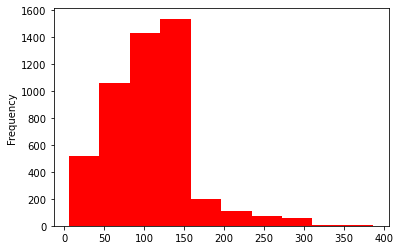

In [4]:
length_tweet = df['text'].str.len().plot.hist(color = 'red', figsize = (6, 4))

In [9]:
df_whole['length'] = df['text'].str.len()
df_whole['length'].describe()

count    4999.000000
mean      107.402681
std        50.913697
min         6.000000
25%        72.000000
50%       108.000000
75%       134.000000
max       387.000000
Name: length, dtype: float64

In [10]:
df_whole[df_whole['length']==387]['text'].iloc[0]

'@marksandspencer @117241 @117244 @117242 @Tesco @sainsburys @117248 @AldiUK @117249 @Morrisons @117250 @117251 @117243 @117247 Imagine making your customers pay more than twice as much per pie for your top range and still only scoring a point higher than our basics. ;)\n\nJust you wait till our Deluxe mince pies get marked! And on that note, @117242 drop us a DM! https://t.co/8X2QAr23zN'

# Changing the casing of the words

play = Play = PLAY

In [13]:
df = df_whole.iloc[:,5:6]
df["text"] = df["text"].astype(str)
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.


# Removal of Punctuations

Okay = okay!

 The string.punctuation in python has the following symbols : 

(`@[\\]^_{|}~!"#$%&<=>?\'()*+,-./:;)

maketrans(x,y,z) : It is used to construct the transition i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string
x : Specifies the list of characters that need to be replaced.
y : Specifies the list of characters with which the characters need to be replaced.
z : Specifies the list of characters that needs to be deleted.

translate --> to do the mapping

In [14]:
# for clarity we remove the new column created in the last line
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_wo_punct
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...
4,@sprintcare I did.,sprintcare I did


Removal of stopwords such as 'a', 'an' and 'the'. They do not provide any valuable information and should be removed from the text

These stopwords are already compiled in a list for different languages. In case of english it is the nltk package

In [ ]:
#!pip install -U nltk

In [6]:
stops = set(stopwords.words('english'))
print(stops)

{'haven', 'into', 'more', 'with', 'here', 'when', 'at', 't', 'couldn', 'an', 'where', 'been', 'its', 'being', "haven't", "should've", 'me', 'we', 'against', 'yourselves', "aren't", 'whom', 'yourself', 'up', 'had', "don't", "wouldn't", 'himself', 'through', 'have', 'themselves', 'wasn', 'don', 'not', "mustn't", 'aren', 'do', "it's", 'while', 'most', "you're", 'once', 'y', 'those', 'further', 'yours', 'itself', 'is', 'if', 'above', 'and', 'him', 'between', 'before', "needn't", 're', 'own', 'of', 'theirs', 'it', 'can', 'that', 'than', 'or', 'does', 'too', 'about', 'these', 's', 'our', 'they', 'mightn', 'am', 'this', 'how', 'same', 'doesn', 'were', 'ma', 'then', 'all', 'ours', 'll', 'ain', 'in', 'isn', "couldn't", 'any', 'will', 'very', 'their', 'shouldn', 've', 'weren', 'myself', 'm', "isn't", "weren't", 'them', "shan't", 'are', "hadn't", 'as', "didn't", 'who', 'why', 'i', 'both', 'other', 'off', 'some', 'because', "you'd", 'a', 'from', 'on', 'ourselves', 'hers', 'won', 'has', 'down', 'mu

In [7]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,text,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...
4,@sprintcare I did.,sprintcare I did,sprintcare I


Looking for the most common words and removing them from the text

In [8]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 1437),
 ('us', 752),
 ('DM', 514),
 ('help', 479),
 ('Please', 376),
 ('We', 338),
 ('Hi', 293),
 ('Thanks', 287),
 ('get', 279),
 ('please', 247)]

In [11]:
freqwords = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in freqwords])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,text,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...,115712 send Private Message assist Just click ...
4,@sprintcare I did.,sprintcare I did,sprintcare I,sprintcare


Stemming : removes words which belong to the same group, like talk, talking

In [12]:
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True) 

In [14]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head(10)

,text,text_wo_stopfreq,text_stemmed
0,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,sprintcare propose,@sprintcar and how do you propos we do that
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...
3,@115712 Please send us a Private Message so th...,115712 send Private Message assist Just click ...,@115712 pleas send us a privat messag so that ...
4,@sprintcare I did.,sprintcare,@sprintcar i did.
5,@115712 Can you please send us a private messa...,115712 Can send private message gain details a...,@115712 can you pleas send us a privat message...
6,@sprintcare is the worst customer service,sprintcare worst customer service,@sprintcar is the worst custom servic
7,@115713 This is saddening to hear. Please shoo...,115713 This saddening hear shoot look KC,@115713 thi is sadden to hear. pleas shoot us ...
8,@sprintcare You gonna magically change your co...,sprintcare You gonna magically change connecti...,@sprintcar you gonna magic chang your connect ...
9,@115713 We understand your concerns and we'd l...,115713 understand concerns wed like send Direc...,@115713 we understand your concern and we'd li...


In [15]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

Lemmatization : Similar to stemming, it reduces the words to their root stem but differs in the way that it makes sure the root word  belongs to the language.

Slower than stemming

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,text_wo_stopfreq,text_stemmed,text_lemmatized
0,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,@115712 i understand. i would like to assist y...,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that,sprintcare propose,@sprintcar and how do you propos we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...,115712 send Private Message assist Just click ...,@115712 pleas send us a privat messag so that ...,@115712 Please send u a Private Message so tha...
4,@sprintcare I did.,sprintcare,@sprintcar i did.,@sprintcare I did.


In [17]:
lemmatizer.lemmatize("sleeping")

'sleeping'

In [18]:
lemmatizer.lemmatize("sleeping","v") # v is for verb

'sleep'

In [19]:
print("The Word is : stripes")
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

The Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


Removal of URLs

In [11]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [13]:
s = 'a\tb\nc\td'
print(s)

a	b
c	d


In [14]:
s = r'a\tb\nc\td'
print(s)

a\tb\nc\td


In [12]:
text1 = "This is my website, https://www.abc.com, check it out"
remove_urls(text1)

'This is my website,  check it out'

In [22]:
text = "Want to learn more. Checkout www.h2o.ai for additional information"
remove_urls(text)

'Want to learn more. Checkout  for additional information'

# Please kill ur kernel and restart the code below

The preparation stage consists of steps that clean up the data and cut out the extras. The steps are 
1. removing URLs and Twitter handles, 
2. making all text lowercase, 
3. removing numbers, 
4. removing punctuation, 
5. tokenization, 
6. removing stopwords, and 
7. stemming/lemmatization

In [1]:
import numpy as np
import pandas as pd
import re  # used for preprocessing
import nltk  # Natural Language Toolkit, used for preprocessing
import string #used for preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

In [2]:
df_whole = pd.read_csv("/home/mona/python_notebooks/data-visualization-main/twcs.csv", nrows=5000)
df = df_whole[["text"]]
df_whole.head()

,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [6]:
df = df_whole.iloc[:,5:6]
df["text"] = df["text"].astype(str)
df.head()

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [7]:
# remove all urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# make all text lowercase
def text_lowercase(text):
    return text.lower()
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [8]:
pp_text_train = [] # our preprocessed text column
for text_data in df['text']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
df['pp_text'] = pp_text_train # add the preprocessed text as a column

In [9]:
df.head()

,text,pp_text
0,@115712 I understand. I would like to assist y...,understand would like assist would need get pr...
1,@sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare sent several private message one re...
3,@115712 Please send us a Private Message so th...,please send u private message assist click ‘ m...
4,@sprintcare I did.,sprintcare


In [10]:
final_text_data = list(df['pp_text'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()

# the vectorizer must be fit onto the entire corpus
fitted_vectorizer = tf.fit(final_text_data)

transform_all = fitted_vectorizer.transform(df['pp_text'])


In [12]:
print(transform_all)

  (0, 5745)	0.4456221575481119
  (0, 5392)	0.2971301363240985
  (0, 4538)	0.39872151996084854
  (0, 3959)	0.3477166153784154
  (0, 3426)	0.2149838498672251
  (0, 2987)	0.24521673893262155
  (0, 2973)	0.20097567623680238
  (0, 2140)	0.19313213598863382
  (0, 375)	0.49920770281839877
  (1, 4826)	0.5821845309552136
  (1, 3997)	0.8130566843194009
  (2, 5485)	0.44224804518192107
  (2, 4826)	0.34442562445916886
  (2, 4593)	0.3856751786145826
  (2, 4568)	0.2880742397499078
  (2, 4311)	0.4109520380961654
  (2, 3959)	0.3856751786145826
  (2, 3589)	0.2484298976069023
  (2, 3232)	0.27333351368254377
  (3, 5230)	0.36132675476387416
  (3, 4561)	0.2287878496512003
  (3, 3979)	0.3958127137465565
  (3, 3959)	0.37834209487323806
  (3, 3837)	0.1671200089543878
  (3, 3232)	0.5362729047650792
  :	:
  (3996, 631)	0.29508875108229626
  (3996, 244)	0.3477179960385903
  (3997, 5100)	0.3076793291715245
  (3997, 3365)	0.3829288990684415
  (3997, 2250)	0.49178082071284723
  (3997, 2145)	0.36012264035090025
  (39